# Motifs in Immigration Networks

## Part 1. Data Prep

In [578]:
cd "UN_MigFlow_All_CountryFiles"

/Users/carla/Desktop/MSc Social Data Science/Statistical Analysis of Networks/UN_MigFlow_All_CountryFiles


In [579]:
import glob
import pandas as pd
import matplotlib.pyplot as plt

In [580]:
country = []
df = pd.DataFrame()

for filename in glob.glob('*.xlsx'):
    country.append(filename.split('.')[0])
    temp = pd.read_excel(filename, index_col=0, skiprows=20, sheet_name=str(country[-1])+' by Citizenship')
    temp['source'] = country[-1]
    df = df.append(temp, sort=True)

In [605]:
df = df.reset_index()
immigrant_df = df[df['Type'] == "Immigrants"] 

In [606]:
#more data cleaning
immigrant_df = immigrant_df.rename(columns={'source':'Target', 'OdName':'Source'})
immigrant_df = immigrant_df.replace({'Source': 'China (including Hong Kong Special Administrative Region)', 'Target': 'China (including Hong Kong Special Administrative Region)'}, 'China')
immigrant_df = immigrant_df.replace({'Source': 'Libyan Arab Jamahiriya', 'Target': 'Libyan Arab Jamahiriya'}, 'Libya')
immigrant_df = immigrant_df.replace({'Source': 'Rep of Moldova', 'Target': 'Rep of Moldova'}, 'Republic of Moldova')
immigrant_df = immigrant_df.replace({'Source': 'Russian Fed', 'Target': 'Russian Fed'}, 'Russian Federation')
immigrant_df = immigrant_df.replace({'Source': 'United Kingdom of Great Britain and Northern Ireland', 'Target': 'United Kingdom of Great Britain and Northern Ireland'}, 'United Kingdom')
immigrant_df = immigrant_df.replace({'Source': 'USA', 'Target': 'USA'}, 'United States of America')
immigrant_df = immigrant_df[immigrant_df['Source'] != "Total"]
immigrant_df = immigrant_df[immigrant_df['Source'] != "Unknown"]

In [607]:
immigrant_df.to_csv("immigrant_df.csv", sep='\t', encoding='utf-8')

In [608]:
immigrant_df.head()

,index,Type,Coverage,Source,AREA,AreaName,REG,RegName,DEV,DevName,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Target
185,185,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,...,656,1669,835,1033,1558,1920,3415,4673,4165,Sweden
186,186,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,...,96,180,96,98,122,164,137,226,192,Sweden
187,187,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,...,111,163,119,127,145,122,100,136,98,Sweden
188,188,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,...,0,0,0,..,..,1,0,0,0,Sweden
189,189,Immigrants,Foreigners,Angola,903,Africa,911,Middle Africa,902,Developing regions,...,19,86,30,17,27,10,15,17,8,Sweden


In [609]:
immigrant_df.columns

Index([   'index',     'Type', 'Coverage',   'Source',     'AREA', 'AreaName',
            'REG',  'RegName',      'DEV',  'DevName',       1980,       1981,
             1982,       1983,       1984,       1985,       1986,       1987,
             1988,       1989,       1990,       1991,       1992,       1993,
             1994,       1995,       1996,       1997,       1998,       1999,
             2000,       2001,       2002,       2003,       2004,       2005,
             2006,       2007,       2008,       2009,       2010,       2011,
             2012,       2013,   'Target'],
      dtype='object')

In [610]:
# use only last 10 years of available data
cols_to_convert = [2004,2005,2006,2007,2008,2009,2010,2011,2012,2013]
missing = []

for col in cols_to_convert:
    immigrant_df[col] = pd.to_numeric(immigrant_df[col], errors='coerce')
    missing.append(immigrant_df[col].isna().sum())

dict(zip(cols_to_convert, missing))

{2004: 928,
 2005: 1137,
 2006: 827,
 2007: 490,
 2008: 496,
 2009: 1552,
 2010: 1948,
 2011: 1754,
 2012: 1657,
 2013: 1863}

In [611]:
cols_to_convert1 = [2004,2005,2006,2007,2008]
cols_to_convert2 = [2009,2010,2011,2012,2013]
immigrant_df['Weight1'] = immigrant_df[cols_to_convert1].sum(axis=1)
immigrant_df['Weight2'] = immigrant_df[cols_to_convert2].sum(axis=1)

In [612]:
#Weight
immigrant_df['Weight'] = immigrant_df[cols_to_convert].sum(axis=1)

In [613]:
immigrant_df.head()

,index,Type,Coverage,Source,AREA,AreaName,REG,RegName,DEV,DevName,...,2008,2009,2010,2011,2012,2013,Target,Weight1,Weight2,Weight
185,185,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,...,1033.0,1558.0,1920.0,3415.0,4673.0,4165.0,Sweden,5157.0,15731.0,20888.0
186,186,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,...,98.0,122.0,164.0,137.0,226.0,192.0,Sweden,538.0,841.0,1379.0
187,187,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,...,127.0,145.0,122.0,100.0,136.0,98.0,Sweden,605.0,601.0,1206.0
188,188,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,...,NaN,NaN,1.0,0.0,0.0,0.0,Sweden,0.0,1.0,1.0
189,189,Immigrants,Foreigners,Angola,903,Africa,911,Middle Africa,902,Developing regions,...,17.0,27.0,10.0,15.0,17.0,8.0,Sweden,175.0,77.0,252.0


In [615]:
#drop self loops
immigrant_df = immigrant_df[immigrant_df['Source'] != immigrant_df['Target']]

In [620]:
immigrant_df.to_csv("test.csv", sep=',', encoding='utf-8', index=False)

In [619]:
print(immigrant_df.loc[immigrant_df['Source'] == immigrant_df['Target']])

Empty DataFrame
Columns: [index, Type, Coverage, Source, AREA, AreaName, REG, RegName, DEV, DevName, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, Target, Weight1, Weight2, Weight]
Index: []

[0 rows x 48 columns]


In [617]:
#For Gephi visualization
immigrant_df[['Source', 'Target', 'Weight']].to_csv("immigrant_df_total04_13.csv", sep=',', encoding='utf-8', index=False)

In [618]:
immigrant_df[['Source', 'Target', 'Weight1']].to_csv("immigrant_df_total04_08.csv", sep=',', encoding='utf-8', index=False)
immigrant_df[['Source', 'Target', 'Weight2']].to_csv("immigrant_df_total09_13.csv", sep=',', encoding='utf-8', index=False)

## Part 2. Summary Statistics

In [648]:
import os
os.chdir('..')

In [649]:
import networkx as nx

In [759]:
g = nx.read_graphml("04-13CompleteandDenseData.graphml")

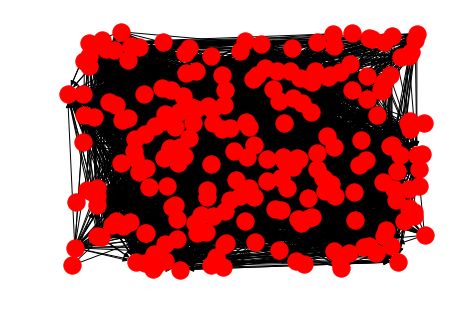

In [674]:
#just want to confirm it's a directed graph
nx.draw_random(g)

### Degree = number of countries | Weighted Degree = number of people

**2004-2008** <br>
**2009-2013** <br>

**Average path length (Gephi)**
1.468
1.401; 1.401

**Average in degree**
21.299145299145298;98900.98717948717 
17.444444444444443; 62489.606837606836

**Average out degree**
21.299145299145298;98900.98717948717 
17.444444444444443; 62489.606837606836

**Average betweenness centrality**
0.00033116970182235834; 0.0014455872394861591
0.00021392819602084067; 0.0010652796698749044

**In degree:**
('Netherlands', 182),
 ('New Zealand', 182),
 ('Norway', 184),
 ('Switzerland', 188),
 ('Germany', 190),
 ('Canada', 193),
 ('Italy', 193),
 ('Spain', 193),
 ('United States of America', 194),
 ('Australia', 200)
 
 <br>
 
 ('Finland', 166),
 ('Denmark', 168),
 ('Netherlands', 180),
 ('Norway', 180),
 ('Sweden', 181),
 ('Switzerland', 188),
 ('Italy', 189),
 ('Canada', 190),
 ('Spain', 192),
 ('United States of America', 199)

**Weighted in degree**
('Czech Republic', 360276.0),
 ('Austria', 373496.0),
 ('Switzerland', 585577.0),
 ('Canada', 1212049.0),
 ('United Kingdom', 1405735.0),
 ('Italy', 1925425.0),
 ('Australia', 2081810.0),
 ('Germany', 2818073.0),
 ('Spain', 3617952.0),
 ('United States of America', 5399367.0)]
 
  <br>
 
 ('Norway', 291961.0),
 ('Sweden', 400191.0),
 ('Netherlands', 412619.0),
 ('Belgium', 447142.0),
 ('Switzerland', 639831.0),
 ('Canada', 1285673.0),
 ('United Kingdom', 1319039.0),
 ('Spain', 1551102.0),
 ('Italy', 1777882.0),
 ('United States of America', 5185310.0)
 
**Out degree**
('Republic of Moldova', 36),
 ('Turkey', 36),
 ('United States of America', 36),
 ('Belarus', 37),
 ('Germany', 37),
 ('Israel', 37),
 ('Kazakhstan', 37),
 ('Russian Federation', 38),
 ('Georgia', 39),
 ('Ukraine', 39)]
 
  <br>
 
 ('Uzbekistan', 29),
 ('Belarus', 30),
 ('Israel', 30),
 ('Kazakhstan', 30),
 ('Turkey', 30),
 ('Georgia', 31),
 ('Germany', 31),
 ('Russian Federation', 31),
 ('Ukraine', 31),
 ('United States of America', 31)
 
**Weighted out degree**
('Ukraine', 545736.0),
 ('Germany', 572035.0),
 ('Philippines', 631318.0),
 ('Morocco', 644063.0),
 ('United Kingdom', 845237.0),
 ('Mexico', 917699.0),
 ('India', 1065376.0),
 ('China', 1175700.0),
 ('Poland', 1379992.0),
 ('Romania', 1571250.0)]
 
  <br>
 
 ('France', 318243.0),
 ('Pakistan', 361470.0),
 ('Morocco', 364160.0),
 ('Germany', 430602.0),
 ('Poland', 474765.0),
 ('Philippines', 576886.0),
 ('Mexico', 781755.0),
 ('Romania', 826895.0),
 ('India', 882667.0),
 ('China', 918539.0)
 
**Betweenness centrality**
 ('Norway', 0.0022014481323022464),
 ('Ireland', 0.0025382720541630294),
 ('Spain', 0.0029355419644696477),
 ('New Zealand', 0.0029796063846501517),
 ('Belarus', 0.003790386677279698),
 ('Republic of Moldova', 0.0039611645733790835),
 ('Canada', 0.004209907387512191),
 ('Germany', 0.006405848562220583),
 ('United States of America', 0.011089231582445288),
 ('Australia', 0.01146288198551659)]
 
  <br>
 
 [('Norway', 0.0015607036123270407),
 ('Netherlands', 0.0016985192019426144),
 ('Belarus', 0.001976877498341348),
 ('Switzerland', 0.002008140546422738),
 ('New Zealand', 0.0021799752992190864),
 ('Ireland', 0.0022544140719772316),
 ('Italy', 0.0024583385328489048),
 ('Spain', 0.0028620915801567844),
 ('Canada', 0.004511907336400211),
 ('United States of America', 0.015024491880910987)]
 
**Weighted betweenness centrality**
('Latvia', 0.014961644714123626),
 ('Bulgaria', 0.015340572739381384),
 ('Cyprus', 0.01682545261703912),
 ('Republic of Moldova', 0.018450002466577867),
 ('Iceland', 0.020915963691973752),
 ('Croatia', 0.02309611020669922),
 ('New Zealand', 0.024772458191505108),
 ('Armenia', 0.028426384983473937),
 ('Luxembourg', 0.03639589808100242),
 ('Azerbaijan', 0.03886062601746338)]
 
  <br>
 
 [('Lithuania', 0.0061007720388732666),
 ('Latvia', 0.010294879384342164),
 ('Croatia', 0.016948473188298552),
 ('Armenia', 0.017559567855557196),
 ('Belarus', 0.01788330620097676),
 ('Azerbaijan', 0.018384329830792755),
 ('Republic of Moldova', 0.021540624537516647),
 ('Iceland', 0.030911770509594986),
 ('New Zealand', 0.03560320161807508),
 ('Luxembourg', 0.03715282916481673)]
 
**Transitivity**
0.954225937627549 <br>
0.9553200053669664

In [734]:
#top destinations by number of countries
sorted(g.in_degree(), key=lambda x: x[1])[-10:]

[('Sweden', 184),
 ('Netherlands', 184),
 ('Norway', 188),
 ('Germany', 190),
 ('Switzerland', 190),
 ('Italy', 193),
 ('Spain', 193),
 ('Canada', 194),
 ('Australia', 200),
 ('United States of America', 200)]

In [735]:
#average in degree
np.mean([x[1] for x in sorted(g.in_degree(), key=lambda x: x[1])])

22.44871794871795

In [736]:
#top destinations by number of people
sorted(g.in_degree(weight='weight'), key=lambda x: x[1])[-10:]

[('Netherlands', 760408.0),
 ('Belgium', 761397.0),
 ('Switzerland', 1225408.0),
 ('Australia', 2081810.0),
 ('Canada', 2497722.0),
 ('United Kingdom', 2724774.0),
 ('Germany', 2818073.0),
 ('Italy', 3703307.0),
 ('Spain', 5169054.0),
 ('United States of America', 10584677.0)]

In [737]:
np.mean([x[1] for x in sorted(g.in_degree(weight='weight'), key=lambda x: x[1])])

161390.59401709403

In [745]:
#top leavers by number of destination countries 
sorted(g.out_degree(), key=lambda x: x[1])[-10:]

[('Kazakhstan', 37),
 ('Lithuania', 37),
 ('Republic of Moldova', 37),
 ('United States of America', 37),
 ('Uzbekistan', 37),
 ('Armenia', 38),
 ('Israel', 38),
 ('Russian Federation', 38),
 ('Georgia', 39),
 ('Ukraine', 39)]

In [739]:
np.mean([x[1] for x in sorted(g.out_degree(), key=lambda x: x[1])])

22.44871794871795

In [746]:
#top leavers by number of people leaving
sorted(g.out_degree(weight='weight'), key=lambda x: x[1])[-10:]

[('Ukraine', 789482.0),
 ('Germany', 1002637.0),
 ('Morocco', 1008223.0),
 ('United Kingdom', 1145726.0),
 ('Philippines', 1208204.0),
 ('Mexico', 1699454.0),
 ('Poland', 1854757.0),
 ('India', 1948043.0),
 ('China', 2094239.0),
 ('Romania', 2398145.0)]

In [740]:
np.mean([x[1] for x in sorted(g.out_degree(weight='weight'), key=lambda x: x[1])])

161390.59401709403

Perhaps India, Mexico, China, Philippines, etc only had one destination, whereas Germany had a more diverse immigration movement (39)

### Centrality measures | what about for weighted?

In [656]:
sorted(nx.out_degree_centrality(g).items(), key=lambda x: x[1])[-10:]

[('Republic of Moldova', 0.15450643776824036),
 ('Turkey', 0.15450643776824036),
 ('United States of America', 0.15450643776824036),
 ('Belarus', 0.15879828326180256),
 ('Germany', 0.15879828326180256),
 ('Israel', 0.15879828326180256),
 ('Kazakhstan', 0.15879828326180256),
 ('Russian Federation', 0.1630901287553648),
 ('Georgia', 0.16738197424892703),
 ('Ukraine', 0.16738197424892703)]

In [657]:
sorted(nx.in_degree_centrality(g).items(), key=lambda x: x[1])[-10:]

[('Netherlands', 0.7811158798283262),
 ('New Zealand', 0.7811158798283262),
 ('Norway', 0.7896995708154506),
 ('Switzerland', 0.8068669527896996),
 ('Germany', 0.8154506437768241),
 ('Canada', 0.8283261802575107),
 ('Italy', 0.8283261802575107),
 ('Spain', 0.8283261802575107),
 ('United States of America', 0.8326180257510729),
 ('Australia', 0.8583690987124464)]

In [658]:
sorted(nx.degree_centrality(g).items(), key=lambda x: x[1])[-10:]

[('Austria', 0.9098712446351931),
 ('Netherlands', 0.9184549356223176),
 ('Norway', 0.9313304721030042),
 ('Switzerland', 0.944206008583691),
 ('Italy', 0.9656652360515021),
 ('Spain', 0.9699570815450643),
 ('Canada', 0.9742489270386266),
 ('Germany', 0.9742489270386266),
 ('United States of America', 0.9871244635193133),
 ('Australia', 0.9957081545064378)]

In [741]:
sorted(nx.betweenness_centrality(g).items(), key=lambda x: x[1])[-10:]

[('Norway', 0.002048245360913202),
 ('Spain', 0.0024161345772356637),
 ('Ireland', 0.0024547940350041074),
 ('New Zealand', 0.002952816959354203),
 ('Canada', 0.00320475747582806),
 ('Belarus', 0.0033973149477638715),
 ('Republic of Moldova', 0.003491192673636563),
 ('Germany', 0.0052730728867814965),
 ('United States of America', 0.011055054181901282),
 ('Australia', 0.011159543692915911)]

In [760]:
np.mean([x[1] for x in sorted(nx.betweenness_centrality(g).items(), key=lambda x: x[1])])

0.0003073735499368177

In [749]:
sorted(nx.betweenness_centrality(g, weight="weight").items(), key=lambda x: x[1])[-10:]

[('Lithuania', 0.01285703714666272),
 ('Azerbaijan', 0.021409895910413895),
 ('Cyprus', 0.02264626806768289),
 ('Republic of Moldova', 0.024528575304622362),
 ('Luxembourg', 0.02721560357160475),
 ('Latvia', 0.028516723397957668),
 ('Croatia', 0.0350901534211435),
 ('New Zealand', 0.04848983769917617),
 ('Armenia', 0.05021335898574318),
 ('Iceland', 0.05091016723397957)]

In [761]:
np.mean([x[1] for x in sorted(nx.betweenness_centrality(g, weight="weight").items(), key=lambda x: x[1])])

0.0016389105505022331

In [661]:
sorted(nx.closeness_centrality(g).items(), key=lambda x: x[1])[-10:]

[('Netherlands', 0.8095775920487914),
 ('New Zealand', 0.8095775920487914),
 ('Norway', 0.8157107556249187),
 ('Switzerland', 0.8282601518653021),
 ('Germany', 0.8346807731975913),
 ('Canada', 0.8445005469999158),
 ('Italy', 0.8445005469999158),
 ('Spain', 0.8445005469999158),
 ('United States of America', 0.8478253523030651),
 ('Australia', 0.8683372559878166)]

### Clustering coefficient
The global cc (transitivity) gives an overall indication of the clustering in the network, whereas the local gives an indication of the embeddedness of single nodes.

In [762]:
#global
nx.transitivity(g)

0.9584582855405536

In [731]:
#local = proportion of friends that are friends themselves
print(nx.average_clustering(g)) #Gephi: 0.763
nx.clustering(g)

0.7503870715767028


{'Afghanistan': 0.96,
 'Sweden': 0.20378023010096266,
 'Albania': 0.965,
 'Algeria': 0.9633333333333334,
 'Andorra': 1.0,
 'Angola': 0.9891774891774892,
 'Antigua and Barbuda': 1.0,
 'Argentina': 0.9891304347826086,
 'Armenia': 0.7213642213642214,
 'Australia': 0.9285714285714286,
 'Austria': 0.2283119831360467,
 'Azerbaijan': 0.685131195335277,
 'Bahamas': 1.0,
 'Bahrain': 0.9958333333333333,
 'Bangladesh': 0.9353846153846154,
 'Barbados': 1.0,
 'Belarus': 0.36129449838187705,
 'Belgium': 0.3821656050955414,
 'Belize': 0.9924242424242424,
 'Benin': 0.9970760233918129,
 'Bhutan': 0.9952380952380953,
 'Bolivia (Plurinational State of)': 0.9952380952380953,
 'Bosnia and Herzegovina': 0.967391304347826,
 'Botswana': 0.9952380952380953,
 'Brazil': 0.9584615384615385,
 'Brunei Darussalam': 1.0,
 'Bulgaria': 0.4263188918361332,
 'Burkina Faso': 0.9967320261437909,
 'Burundi': 0.9967320261437909,
 'Cabo Verde': 0.9875,
 'Cambodia': 0.9973684210526316,
 'Cameroon': 0.9855072463768116,
 'Canada

In [114]:
# nx.triangles(g) --> not implemented for direct networks

## Part 3. Motif detection

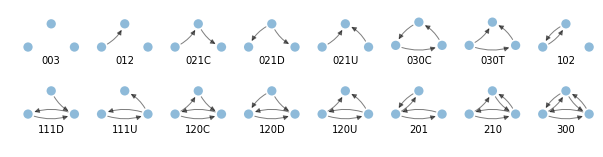

In [66]:
from triadic_census import triadic, draw_triads

The first number is the number of bidirectional edges. <br>
The second number is the number of single edges.<br>
The third number is the number of “non-existent” edges.<br>
A letter code to distinguish directed variations of the same triad—U for “up,” D for “down,” C for “circle,” and T for “transitive” (i.e., having 2 paths that lead to the same endpoint).

In [763]:
g = nx.read_graphml("04-13CompleteandDenseData.graphml")
h = nx.read_graphml("04-08CompleteandDenseData.graphml")
i = nx.read_graphml("09-13CompleteandDenseData.graphml")

In [773]:
nx.triadic_census(g)

{'003': 1437155,
 '012': 282954,
 '102': 32775,
 '021D': 21,
 '021U': 263954,
 '021C': 514,
 '111D': 30864,
 '111U': 18,
 '030T': 3198,
 '030C': 0,
 '201': 34,
 '120D': 49317,
 '120U': 343,
 '120C': 42,
 '210': 1940,
 '300': 5055}

In [765]:
nx.triadic_census(h)

{'003': 1463013,
 '012': 283027,
 '102': 34045,
 '021D': 132,
 '021U': 241181,
 '021C': 577,
 '111D': 32026,
 '111U': 52,
 '030T': 2857,
 '030C': 0,
 '201': 105,
 '120D': 44096,
 '120U': 346,
 '120C': 35,
 '210': 1894,
 '300': 4798}

In [766]:
nx.triadic_census(i)

{'003': 1558147,
 '012': 253604,
 '102': 22317,
 '021D': 33,
 '021U': 215130,
 '021C': 291,
 '111D': 20222,
 '111U': 3,
 '030T': 2676,
 '030C': 0,
 '201': 14,
 '120D': 32064,
 '120U': 114,
 '120C': 15,
 '210': 977,
 '300': 2577}

### Which countries are part of the most triads?

In [67]:
census, node_census = triadic.triadic_census(g)

In [162]:
sorted(census.items(), key=lambda x: x[1])

[('030C', 0),
 ('111U', 18),
 ('021D', 21),
 ('120C', 34),
 ('201', 35),
 ('120U', 338),
 ('021C', 445),
 ('210', 1895),
 ('030T', 3050),
 ('300', 5145),
 ('111D', 30926),
 ('102', 32640),
 ('120D', 50149),
 ('021U', 267246),
 ('012', 282025),
 ('003', 1434217.0)]

In [69]:
keys= list(node_census.values())
print('| Node |', ' | '.join(keys[1]))
for k in node_census.keys():
    print('|', k, '|',' | '.join([str(v) for v in node_census[k].values()]))

| Node | 003 | 012 | 102 | 021D | 021U | 021C | 111D | 111U | 030T | 030C | 201 | 120D | 120U | 120C | 210 | 300
| Afghanistan | 0 | 2406 | 0 | 0 | 3902 | 6 | 118 | 0 | 51 | 0 | 0 | 445 | 0 | 0 | 0 | 0
| Sweden | 0 | 7247 | 1434 | 0 | 11234 | 1 | 1403 | 0 | 83 | 0 | 1 | 3680 | 8 | 0 | 93 | 484
| Albania | 0 | 2209 | 0 | 0 | 3712 | 3 | 107 | 0 | 25 | 0 | 0 | 410 | 0 | 0 | 0 | 0
| Algeria | 0 | 2177 | 0 | 0 | 3706 | 5 | 113 | 0 | 24 | 0 | 0 | 411 | 0 | 0 | 0 | 0
| Andorra | 0 | 656 | 0 | 0 | 1898 | 0 | 254 | 0 | 0 | 0 | 0 | 78 | 0 | 0 | 0 | 0
| Angola | 0 | 1817 | 0 | 0 | 3461 | 3 | 161 | 0 | 5 | 0 | 0 | 346 | 0 | 0 | 0 | 0
| Antigua and Barbuda | 0 | 445 | 0 | 0 | 1492 | 0 | 234 | 0 | 0 | 0 | 0 | 45 | 0 | 0 | 0 | 0
| Argentina | 0 | 2331 | 0 | 0 | 3685 | 0 | 78 | 0 | 16 | 0 | 0 | 449 | 0 | 0 | 0 | 0
| Armenia | 0 | 3537 | 1673 | 1 | 2483 | 19 | 890 | 4 | 222 | 0 | 4 | 361 | 105 | 2 | 236 | 67
| Australia | 0 | 5113 | 774 | 0 | 12675 | 7 | 2049 | 0 | 39 | 0 | 0 | 3286 | 6 | 1 | 74 | 456


## Part 4. Model Fitting

We need to compare whether these results are abnormal = Monte Carlo test of a configuration model or an Erdos-Renyi

In [796]:
#only activate if needed
#g = h
#g = i
g = g

#### Configuration model

In [797]:
#Unweighted
din=[item[1] for item in g.in_degree()]
dout=[item[1] for item in g.out_degree()]
Cg=nx.directed_configuration_model(din,dout)

#Weighted
din_w=[item[1] for item in g.in_degree(weight='weight')]
dout_w=[item[1] for item in g.out_degree(weight='weight')]
Cgw=nx.directed_configuration_model(din,dout)

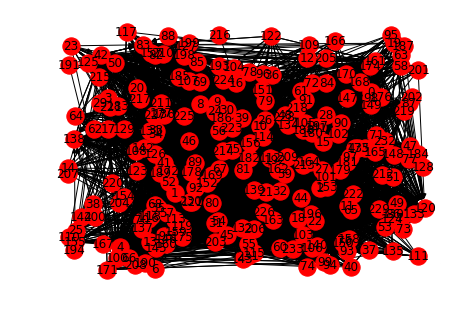

In [299]:
nx.draw_random(Cg)

In [798]:
nx.triadic_census(Cg)

{'003': 1653358,
 '012': 302378,
 '102': 11854,
 '021D': 2513,
 '021U': 102886,
 '021C': 7442,
 '111D': 11822,
 '111U': 277,
 '030T': 7991,
 '030C': 89,
 '201': 218,
 '120D': 5934,
 '120U': 196,
 '120C': 418,
 '210': 649,
 '300': 159}

In [799]:
nx.triadic_census(Cgw)

{'003': 1647687,
 '012': 307030,
 '102': 10554,
 '021D': 2546,
 '021U': 105210,
 '021C': 7893,
 '111D': 10811,
 '111U': 242,
 '030T': 8383,
 '030C': 103,
 '201': 181,
 '120D': 6201,
 '120U': 190,
 '120C': 422,
 '210': 583,
 '300': 148}

In [ ]:
gt=nx.triadic_census(g)
w=pd.DataFrame(columns=gt.keys())

for run in range(49):   
    Cg=nx.directed_configuration_model(din,dout)
    
    #triadic census
    w = w.append(nx.triadic_census(Cg),ignore_index=True)
        
w = w.append(gt, ignore_index=True)
w.plot(kind='box', figsize=(20,10))

In [ ]:
w

In [ ]:
#compare the mean values from the monte carlo
w.tail(1).append(pd.DataFrame(w.head(49).std().astype(int)).T)

### Typing in results to save time

#2004-2013

003	012	102	021D	021U	021C	111D	111U	030T	030C	201	120D	120U	120C	210	300
real	1437155	282954	32775	21	263954	514	30864	18	3198	0	34	49317	343	42	1940	5055
config	1542490	359970	16978	3825	129385	11540	18132	521	12401	181	408	9511	407	851	1267	309


#2004-2008
	003	012	102	021D	021U	021C	111D	111U	030T	030C	201	120D	120U	120C	210	300
real	1463013	283027	34045	132	241181	577	32026	52	2857	0	105	44096	346	35	1894	4798
config	1562233	353057	17148	3567	119896	11033	17508	501	11229	168	397	8762	383	790	1206	298

#2009-2013
	003	012	102	021D	021U	021C	111D	111U	030T	030C	201	120D	120U	120C	210	300
real	1558147	253604	22317	33	215130	291	20222	3	2676	0	14	32064	114	15	977	2577
config	1650830	303422	11743	2564	104310	7405	11813	272	7881	93	220	6191	201	425	647	159
std config	1650830	303422	11743	2564	104310	7405	11813	272	7881	93	220	6191	201	425	647	159


#### Random graph

In [308]:
n=g.number_of_nodes()
p = 2*g.number_of_edges()/float(n*(n-1))
p #edge probability not probability

R = nx.fast_gnp_random_graph(n,p)
Rd = R.to_directed()

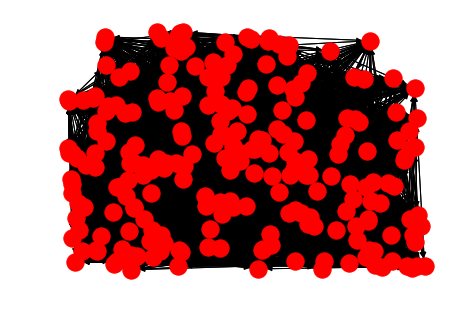

In [309]:
nx.draw_random(Rd)

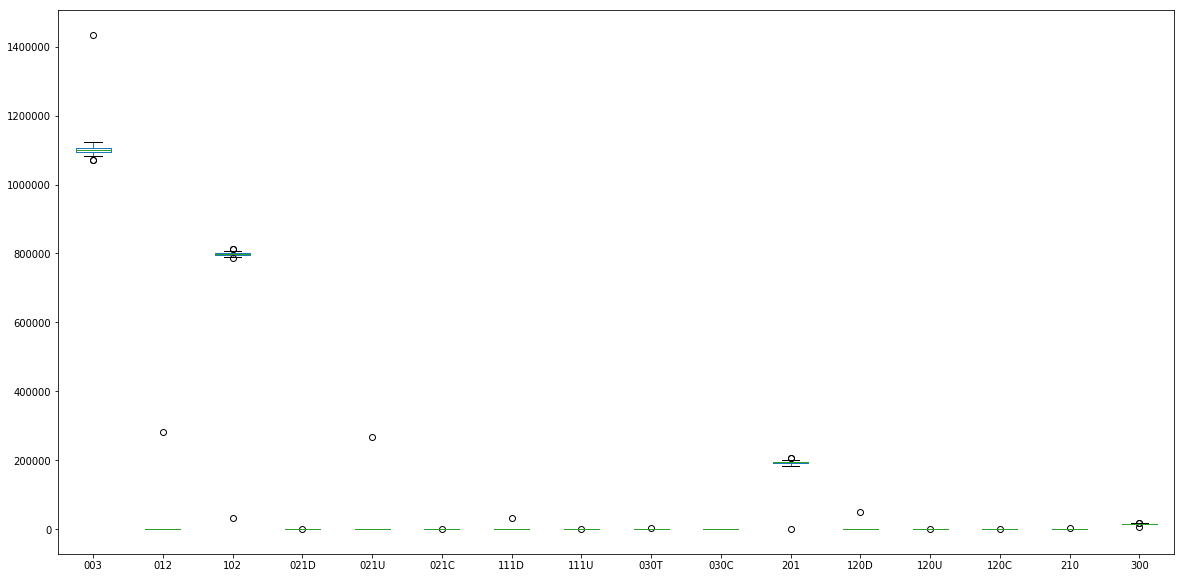

In [418]:
#Monte carlo test
gt=nx.triadic_census(g)
x=pd.DataFrame(columns=gt.keys())

for run in range(49):   
    R = nx.fast_gnp_random_graph(n,p)
    Rd = R.to_directed()
    
    #triadic census
    x = x.append(nx.triadic_census(Rd),ignore_index=True)
        
x = x.append(gt, ignore_index=True)
x.plot(kind='box', figsize=(20,10))

In [771]:
x

,003,012,102,021D,021U,021C,111D,111U,030T,030C,201,120D,120U,120C,210,300
0,1072298,0,812163,0,0,0,0,0,0,0,206404,0,0,0,0,17319
1,1106760,0,795882,0,0,0,0,0,0,0,190564,0,0,0,0,14978
2,1116891,0,790389,0,0,0,0,0,0,0,186237,0,0,0,0,14667
3,1093334,0,802410,0,0,0,0,0,0,0,196442,0,0,0,0,15998
4,1086552,0,806361,0,0,0,0,0,0,0,198678,0,0,0,0,16593
5,1097252,0,800482,0,0,0,0,0,0,0,194808,0,0,0,0,15642
6,1096874,0,801009,0,0,0,0,0,0,0,194424,0,0,0,0,15877
7,1095410,0,800733,0,0,0,0,0,0,0,196120,0,0,0,0,15921
8,1105245,0,796032,0,0,0,0,0,0,0,191793,0,0,0,0,15114
9,1108345,0,794730,0,0,0,0,0,0,0,189969,0,0,0,0,15140


In [772]:
#compare the mean values from the monte carlo
x.tail(1).append(pd.DataFrame(x.head(49).mean().astype(int)).T)

,003,012,102,021D,021U,021C,111D,111U,030T,030C,201,120D,120U,120C,210,300
49,1434217,282025,32640,21,267246,445,30926,18,3050,0,35,50149,338,34,1895,5145
0,1099556,0,799276,0,0,0,0,0,0,0,193700,0,0,0,0,15650


### Chart them together

In [551]:
#normalized z score
z=pd.DataFrame()

#config network first
z['config_mean']= w.head(49).mean().astype(int)
z['config_stdev'] = w.head(49).std().astype(int)

#for charts
z['actual'] = x.tail(1).T
z['rand'] = x.head(49).mean().astype(int)

#computing
z['z_actual'] = (z['actual']-z['config_mean'])/z['config_stdev']
z['z_rand'] = (z['rand']-z['config_mean'])/z['config_stdev']

In [559]:
z

,config_mean,config_stdev,actual,rand,z_actual,z_rand
003,1538496,2223,1434217,1099556,-46.9091,-197.453891
012,360310,1412,282025,0,-55.4426,-255.177054
102,17644,756,32640,799276,19.836,1033.904762
021D,3688,310,21,0,-11.829,-11.896774
021U,131063,1660,267246,0,82.038,-78.953614
021C,11368,461,445,0,-23.6941,-24.659436
111D,19090,763,30926,0,15.5125,-25.019659
111U,503,44,18,0,-11.0227,-11.431818
030T,12266,534,3050,0,-17.2584,-22.970037
030C,173,24,0,0,-7.20833,-7.208333


In [541]:
#z = z.reset_index()

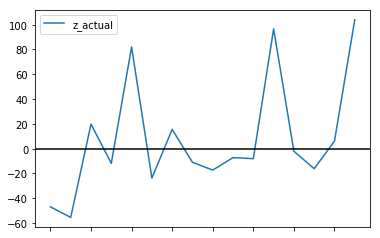

In [554]:
#compared to configuration model
twocols = ['z_actual']
z[twocols].plot.line().axhline(0, color="black")

['z_actual']

In [638]:
G = g
#: The integer codes representing each type of triad.
#:
#: Triads that are the same up to symmetry have the same code.
TRICODES = (1, 2, 2, 3, 2, 4, 6, 8, 2, 6, 5, 7, 3, 8, 7, 11, 2, 6, 4, 8, 5, 9,
            9, 13, 6, 10, 9, 14, 7, 14, 12, 15, 2, 5, 6, 7, 6, 9, 10, 14, 4, 9,
            9, 12, 8, 13, 14, 15, 3, 7, 8, 11, 7, 12, 14, 15, 8, 14, 13, 15,
            11, 15, 15, 16)
#: The names of each type of triad. The order of the elements is
#: important: it corresponds to the tricodes given in :data:`TRICODES`.
TRIAD_NAMES = ('003', '012', '102', '021D', '021U', '021C', '111D', '111U',
               '030T', '030C', '201', '120D', '120U', '120C', '210', '300')


#: A dictionary mapping triad code to triad name.
TRICODE_TO_NAME = {i: TRIAD_NAMES[code - 1] for i, code in enumerate(TRICODES)}


def _tricode(G, v, u, w):
    """Returns the integer code of the given triad.

    This is some fancy magic that comes from Batagelj and Mrvar's paper. It
    treats each edge joining a pair of `v`, `u`, and `w` as a bit in
    the binary representation of an integer.

    """
    combos = ((v, u, 1), (u, v, 2), (v, w, 4), (w, v, 8), (u, w, 16),
              (w, u, 32))
    return sum(x for u, v, x in combos if v in G[u])


census = {name: set([]) for name in TRIAD_NAMES}
n = len(G)
m = {v: i for i, v in enumerate(G)}
for v in G:
    vnbrs = set(G.pred[v]) | set(G.succ[v])
    for u in vnbrs:
        if m[u] <= m[v]:
            continue
        neighbors = (vnbrs | set(G.succ[u]) | set(G.pred[u])) - {u, v}
        # Calculate dyadic triads instead of counting them.
        for w in neighbors:
            if v in G[u] and u in G[v]:
                census['102'].add(tuple(sorted([u, v, w])))
            else:
                census['012'].add(tuple(sorted([u, v, w])))
        # Count connected triads.
        for w in neighbors:
            if m[u] < m[w] or (m[v] < m[w] < m[u] and
                               v not in G.pred[w] and
                               v not in G.succ[w]):
                code = _tricode(G, v, u, w)
                census[TRICODE_TO_NAME[code]].add(tuple(sorted([u, v, w])))

# null triads, I implemented them manually because the original algorithm computes
# them as _number_of_all_possible_triads_ - _number_of_all_found_triads_
for v in G:
    vnbrs = set(G.pred[v]) | set(G.succ[v])
    not_vnbrs = set(G.nodes()) - vnbrs
    for u in not_vnbrs:
        unbrs = set(G.pred[u]) | set(G.succ[u])
        not_unbrs = set(G.nodes()) - unbrs
        for w in not_unbrs:
            wnbrs = set(G.pred[w]) | set(G.succ[w])
            if v not in wnbrs and len(set([u, v, w])) == 3:
                census['003'].add(tuple(sorted([u, v, w])))

# '003': {(1, 3, 4), (1, 3, 5)},
# '012': {(1, 2, 3), (1, 2, 4), (2, 3, 4), (2, 4, 5)},
# '021C': {(1, 2, 3), (1, 2, 4), (2, 4, 5)},
# '021D': {(2, 3, 4)},
# another: empty

In [561]:
triads = ('003','012','102','021D','021U','021C','111D','111U','030T','030C','201','120D','120U','120C','210','300')

#which country had the most of a particular structure
for i in triads:
    check =[[-k,v] for k,v in sorted([[-node_census[k][i],k] for k in node_census.keys()])]
    print(i,"\n", check[0:10])

003 
 [[0, 'Afghanistan'], [0, 'Albania'], [0, 'Algeria'], [0, 'American Samoa'], [0, 'Andorra'], [0, 'Angola'], [0, 'Anguilla'], [0, 'Antigua and Barbuda'], [0, 'Argentina'], [0, 'Armenia']]
012 
 [[8761, 'Belarus'], [8249, 'Croatia'], [8143, 'Belgium'], [7252, 'Cyprus'], [7247, 'Sweden'], [7241, 'Austria'], [6892, 'Bulgaria'], [6548, 'Greece'], [6438, 'Czech Republic'], [6316, 'Hungary']]
102 
 [[2194, 'Belarus'], [1894, 'Belgium'], [1673, 'Armenia'], [1637, 'Estonia'], [1472, 'Azerbaijan'], [1457, 'Croatia'], [1434, 'Sweden'], [1412, 'Cyprus'], [1398, 'Austria'], [1181, 'Czech Republic']]
021D 
 [[16, 'Azerbaijan'], [3, 'Cyprus'], [1, 'Armenia'], [1, 'China'], [0, 'Afghanistan'], [0, 'Albania'], [0, 'Algeria'], [0, 'American Samoa'], [0, 'Andorra'], [0, 'Angola']]
021U 
 [[12675, 'Australia'], [11234, 'Sweden'], [9960, 'Austria'], [8887, 'Canada'], [6074, 'Czech Republic'], [5641, 'Denmark'], [5147, 'Germany'], [4821, 'Finland'], [4442, 'Italy'], [3902, 'Afghanistan']]
021C 
 [[93, 

# Sources

https://www.oreilly.com/library/view/social-network-analysis/9781449311377/ <br>
http://www.un.org/en/development/desa/population/migration/data/empirical2/docs/migflows2015documentation.pdf